# Importing Packages and Datasets

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, cross_val_predict

In [4]:
dabigboy = pd.read_csv("base.xy.df.tsv", delimiter='\t')
dabigboy #the big dataset

KeyboardInterrupt: 

In [ ]:
ensg = pd.read_csv("ensembl.tsv", delimiter='\t')
ensg #the holy grail - has all ensembl id's

In [ ]:
panimmune = pd.read_csv('panimmune.tsv', delimiter='\t')
panimmune

In [ ]:
duplicates_mask = panimmune['SetName'].duplicated(keep=False)

df_duplicates = panimmune[duplicates_mask]

gene_sets = df_duplicates['SetName'].unique()

print("Gene Sets:")
print(gene_sets)

# Training SVM Classifier Models

In [6]:
from sklearn import svm

# Picking out a single set column and assigning it a variable name
gene_set_name = "HER2_Immune_PCA_18006808"
testing_ds = panimmune[panimmune['SetName'] == gene_set_name]

# Making ensembl filter
testing_df = pd.merge(ensg, testing_ds, left_on='symbol', right_on='Gene', how='inner')
testing_filter = testing_df.iloc[:, 1:2]

# Filtering the big df with the ensembl filter
ensemblIDs = set(testing_filter['id']) 
cols = list(dabigboy.columns)
newCols = [a for a in cols if a in ensemblIDs]
finalCols = cols[0:3]
finalCols.extend(newCols)      
testing_df = dabigboy[finalCols]

In [7]:
# Making the train/test split
df_train, df_test = train_test_split(testing_df, test_size=0.25)
x_train = df_train.drop(columns=["Immune Subtype", "TCGA Participant Barcode"]).values
y_train = df_train["Immune Subtype"].values
xt, xv, yt, yv = train_test_split(x_train, y_train, test_size=0.25)

# Making the cross fold validation with SVM model
svmModel = svm.SVC()
cross_val_score(svmModel, x_train, y_train, cv=5, scoring='accuracy')
accuracies = cross_val_score(svmModel, x_train, y_train, cv=5, scoring='accuracy')
print(accuracies)


[0.67209474 0.67703704 0.67407407 0.68888889 0.68740741]


In [22]:
# Define the parameter settings
svm_params = {
    'C': [0.2, 0.5, 1, 1.5, 2],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

# Calculate and store the mean accuracy
mean_accuracy = np.mean(accuracies)
print(f'{gene_set_name} accuracy =', mean_accuracy)

for C in svm_params['C']:
    for kernel in svm_params['kernel']:
        # Create and train the SVM model
        svmModel = svm.SVC(C=C, kernel=kernel)
        accuracies = cross_val_score(svmModel, x_train, y_train, cv=5, scoring='accuracy')
        
        # Print the results
        print(f"{gene_set_name} - C={C}, kernel={kernel} - accuracy =", np.mean(accuracies))

HER2_Immune_PCA_18006808 accuracy = 0.7865508676700388
HER2_Immune_PCA_18006808 - C=0.2, kernel=linear - accuracy = 0.7712925953340461
HER2_Immune_PCA_18006808 - C=0.2, kernel=poly - accuracy = 0.4950403816103298
HER2_Immune_PCA_18006808 - C=0.2, kernel=rbf - accuracy = 0.6010961427748993
HER2_Immune_PCA_18006808 - C=0.2, kernel=sigmoid - accuracy = 0.36839016366477506
HER2_Immune_PCA_18006808 - C=0.5, kernel=linear - accuracy = 0.7712925953340461
HER2_Immune_PCA_18006808 - C=0.5, kernel=poly - accuracy = 0.5332582175069221
HER2_Immune_PCA_18006808 - C=0.5, kernel=rbf - accuracy = 0.6514599336568249
HER2_Immune_PCA_18006808 - C=0.5, kernel=sigmoid - accuracy = 0.38275362557227843
HER2_Immune_PCA_18006808 - C=1, kernel=linear - accuracy = 0.7712925953340461
HER2_Immune_PCA_18006808 - C=1, kernel=poly - accuracy = 0.5665858486169367
HER2_Immune_PCA_18006808 - C=1, kernel=rbf - accuracy = 0.6776785371604024
HER2_Immune_PCA_18006808 - C=1, kernel=sigmoid - accuracy = 0.37964174685418206
HE

# Training RF Models

In [9]:
#test with rf

#picking out a single set column and assigning it a varible name
testing_ds = panimmune[panimmune['SetName'] == "HER2_Immune_PCA_18006808"]
    
    #making ensembl filter
testing_df = pd.merge(ensg, testing_ds, left_on = 'symbol', right_on = 'Gene', how = 'inner')
testing_filter = testing_df.iloc[:, 1:2]

    #filtering the big df with the filter ensmbl filter
ensemblIDs = set(testing_filter['id']) 
cols = list(dabigboy.columns)
newCols = [a for a in cols if a in ensemblIDs]
finalCols = cols[0:3]
finalCols.extend(newCols)      
testing_df = dabigboy[finalCols]
    
    #making the train/test split
df_train, df_test = train_test_split(testing_df, test_size=0.25)
x_train = df_train.drop(columns=["Immune Subtype", "TCGA Participant Barcode"]).values #we drop the columns we dont want to use to train, and we turn the graph back into arrays
y_train = df_train["Immune Subtype"].values
xt, xv, yt, yv = train_test_split(x_train, y_train, test_size=0.25)
    
    #making the cross fold validation with Random Forest model
rfModel = RandomForestClassifier()
cross_val_score(rfModel, x_train, y_train, cv=5, scoring='accuracy')
accuracies = cross_val_score(rfModel, x_train, y_train, cv=5, scoring='accuracy')
print('HER2_Immune_PCA_18006808 =') 
print(np.mean(accuracies)) #kaplin myer, diffrential survival antlsis, upset plot
print(accuracies)

HER2_Immune_PCA_18006808 =
0.7865508676700388
[0.78164323 0.8        0.75185185 0.81111111 0.78814815]


In [24]:
# Define a range of hyperparameter values to test
n_estimators_values = [50, 100, 150]
max_depth_values = [None, 10, 20]

# Iterate over hyperparameter values
for n_estimators in n_estimators_values:
    for max_depth in max_depth_values:
        # Create and train the RandomForestClassifier model
        rfModel = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
        accuracies = cross_val_score(rfModel, x_train, y_train, cv=5, scoring='accuracy')
        
        # Print the results
        print(f'HER2_Immune_PCA_18006808 - n_estimators={n_estimators}, max_depth={max_depth} - accuracy =', np.mean(accuracies))


HER2_Immune_PCA_18006808 - n_estimators=50, max_depth=None - accuracy = 0.7812190695506758
HER2_Immune_PCA_18006808 - n_estimators=50, max_depth=10 - accuracy = 0.7844778901773721
HER2_Immune_PCA_18006808 - n_estimators=50, max_depth=20 - accuracy = 0.7880332264166461
HER2_Immune_PCA_18006808 - n_estimators=100, max_depth=None - accuracy = 0.7889202511171424
HER2_Immune_PCA_18006808 - n_estimators=100, max_depth=10 - accuracy = 0.7832921567014832
HER2_Immune_PCA_18006808 - n_estimators=100, max_depth=20 - accuracy = 0.7920314718863942
HER2_Immune_PCA_18006808 - n_estimators=150, max_depth=None - accuracy = 0.7936604435671794
HER2_Immune_PCA_18006808 - n_estimators=150, max_depth=10 - accuracy = 0.7825517449351647
HER2_Immune_PCA_18006808 - n_estimators=150, max_depth=20 - accuracy = 0.7924767935959646


In [28]:
rfModel = RandomForestClassifier(n_estimators=250, max_depth=50)
accuracies = cross_val_score(rfModel, x_train, y_train, cv=5, scoring='accuracy')
        
        # Print the results
print(f'HER2_Immune_PCA_18006808 - n_estimators={n_estimators}, max_depth={max_depth} - accuracy =', np.mean(accuracies))


HER2_Immune_PCA_18006808 - n_estimators=150, max_depth=20 - accuracy = 0.7948454094360831


In [29]:
rfModel = RandomForestClassifier(n_estimators=50, max_depth=50)
accuracies = cross_val_score(rfModel, x_train, y_train, cv=5, scoring='accuracy')
        
        # Print the results
print(f'HER2_Immune_PCA_18006808 - n_estimators={n_estimators}, max_depth={max_depth} - accuracy =', np.mean(accuracies))

HER2_Immune_PCA_18006808 - n_estimators=150, max_depth=20 - accuracy = 0.785069057214135


# Fine Tuning RandomForest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Picking out a single set column and assigning it a variable name
testing_ds = panimmune[panimmune['SetName'] == "HER2_Immune_PCA_18006808"]

# Making ensembl filter
testing_df = pd.merge(ensg, testing_ds, left_on='symbol', right_on='Gene', how='inner')
testing_filter = testing_df.iloc[:, 1:2]

# Filtering the big df with the ensembl filter
ensemblIDs = set(testing_filter['id']) 
cols = list(dabigboy.columns)
newCols = [a for a in cols if a in ensemblIDs]
finalCols = cols[0:3]
finalCols.extend(newCols)      
testing_df = dabigboy[finalCols]

# Making the train/test split
df_train, df_test = train_test_split(testing_df, test_size=0.25)
x_train = df_train.drop(columns=["Immune Subtype", "TCGA Participant Barcode"]).values
y_train = df_train["Immune Subtype"].values
xt, xv, yt, yv = train_test_split(x_train, y_train, test_size=0.25)


In [32]:
  # Create and train the RandomForestClassifier model
rfModel = RandomForestClassifier(n_estimators=500, max_depth=100)
accuracies = cross_val_score(rfModel, x_train, y_train, cv=5, scoring='accuracy')
        
        # Print the results
print(f'HER2_Immune_PCA_18006808 - n_estimators={n_estimators}, max_depth={max_depth} - accuracy =', np.mean(accuracies))
print(accuracies)

HER2_Immune_PCA_18006808 - n_estimators=150, max_depth=20 - accuracy = 0.7963265619431423
[0.79570688 0.80148148 0.76888889 0.81259259 0.80296296]


In [35]:
  # Create and train the RandomForestClassifier model
rfModel = RandomForestClassifier(n_estimators=500, max_depth=50)
accuracies = cross_val_score(rfModel, x_train, y_train, cv=5, scoring='accuracy')
        
        # Print the results
print(f'HER2_Immune_PCA_18006808 - n_estimators={n_estimators}, max_depth={max_depth} - accuracy =', np.mean(accuracies))
print(accuracies)

HER2_Immune_PCA_18006808 - n_estimators=150, max_depth=20 - accuracy = 0.7963270005757053
[0.79274611 0.80148148 0.76814815 0.81185185 0.80740741]


# Attempting To Plot Via Matplotlib & UMAP

In [136]:
#testing_df.to_csv('immune_df.tsv', index=False, sep='\t')

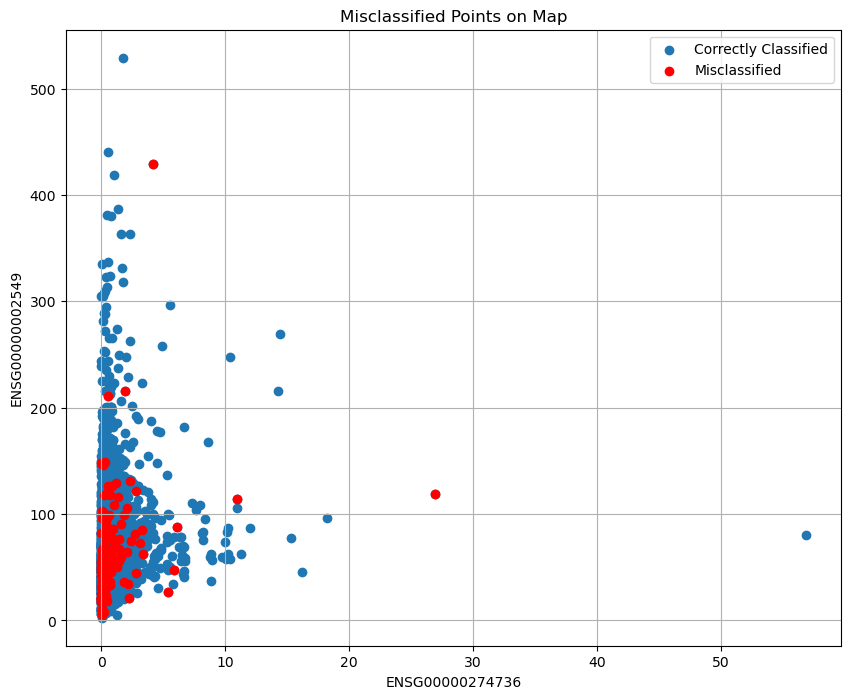

In [83]:

# Split data into train and test
train_df, test_df = train_test_split(true_testing_df, test_size=0.25, random_state=42)

# Prepare features and labels
x_train = train_df.drop(columns=['Immune Subtype'])
y_train = train_df['Immune Subtype']
x_test = test_df.drop(columns=['Immune Subtype'])

# Train a Random Forest model
rfModel = RandomForestClassifier()
rfModel.fit(x_train, y_train)

# Make predictions on test data
predictions = rfModel.predict(x_test)

# Identify misclassified points
misclassified_indices = np.where(predictions != test_df['Immune Subtype'])[0]
misclassified_points = test_df.iloc[misclassified_indices]

# Plotting
plt.figure(figsize=(10, 8))
plt.scatter(true_testing_df['ENSG00000274736'], true_testing_df['ENSG00000002549'], label='Correctly Classified')
plt.scatter(misclassified_points['ENSG00000274736'], misclassified_points['ENSG00000002549'], color='red', label='Misclassified')
plt.xlabel('ENSG00000274736')
plt.ylabel('ENSG00000002549')
plt.title('Misclassified Points on Map')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [2]:
import umap
reducer = umap.UMAP()

In [3]:
testing_df.shape

NameError: name 'testing_df' is not defined

In [104]:
from sklearn.preprocessing import StandardScaler

features_to_normalize = testing_df.columns  # Get all column names as features
# Exclude non-numeric columns (like categorical columns) if needed
numeric_features = testing_df.select_dtypes(include=['float64', 'int64']).columns
# Filter numeric features for normalization
features_to_normalize = features_to_normalize.intersection(numeric_features)
# Extract the selected features and apply StandardScaler
scaled_testing_data = StandardScaler().fit_transform(testing_df[features_to_normalize])


In [131]:
testing_df.shape

(9002, 827)

In [105]:
embedding = reducer.fit_transform(scaled_testing_data)
embedding.shape

(9002, 2)

In [140]:
reduced = pd.DataFrame(embedding)

In [142]:
#reduced.to_csv('reduced.tsv', index=False, sep='\t')

In [6]:
plt.figure(figsize=(10, 6))

# Create a color palette based on unique values in the "Immune Subtype" column
color_palette = sns.color_palette("Set1", n_colors=len(testing_df["Immune Subtype"].unique()))

# Map each unique value to its corresponding color index
color_mapping = {
    subtype: color_index
    for color_index, subtype in enumerate(testing_df["Immune Subtype"].unique())
}

# Create a list of colors based on the mapping of "Immune Subtype" to color index
colors = [color_palette[color_mapping[subtype]] for subtype in testing_df["Immune Subtype"]]

# Scatter plot with custom colors
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=colors, s=1)

# Adding a legend
legend_labels = testing_df["Immune Subtype"].unique()
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markersize=10, markerfacecolor=color)
                  for label, color in zip(legend_labels, color_palette)]
plt.legend(handles=legend_handles, title="Immune Subtype")

plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Final dataset', fontsize=24)
plt.show()

NameError: name 'testing_df' is not defined

<Figure size 1000x600 with 0 Axes>

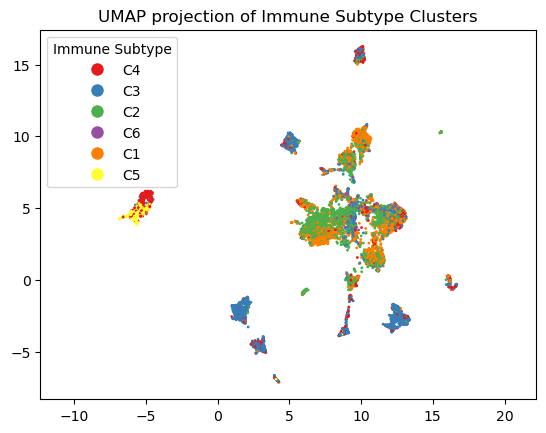

In [153]:
from sklearn.preprocessing import StandardScaler

# Create a color palette based on unique values in the "Immune Subtype" column
color_palette = sns.color_palette("Set1", n_colors=len(testing_df["Immune Subtype"].unique()))

# Map each unique value to its corresponding color
color_mapping = {subtype: color for color, subtype in enumerate(testing_df["Immune Subtype"].unique())}

# Create a list of colors based on the mapping
colors = [color_palette[color_mapping[subtype]] for subtype in testing_df["Immune Subtype"]]

# Scatter plot with custom colors and legend
plt.scatter(embedding[:, 0], embedding[:, 1], c=colors, s=1)
plt.gca().set_aspect('equal', 'datalim')

# Adding a legend
legend_labels = testing_df["Immune Subtype"].unique()
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markersize=10, markerfacecolor=color)
                  for label, color in zip(legend_labels, color_palette)]
plt.legend(handles=legend_handles, title="Immune Subtype")

plt.title('UMAP projection of Immune Subtype Clusters', fontsize=12)
plt.show()


In [152]:
plt.scatter?